In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

In [3]:
from sk_tabnet import TNClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [4]:
sns.set_palette("Paired")

### load model and dataset

In [46]:
# mdl = SVC()
mdl = TNClassifier(n_d = 16, n_a = 16)
# mdl = XGBClassifier()

Device used : cpu


In [47]:
dataset = pd.read_csv("../data/loan/loan_downsampled.csv")
target = dataset["Target"]
feature = dataset.drop(columns = ["Target"])

### Training

In [50]:
train_X, test_X, train_y, test_y = train_test_split(feature, target, random_state = 42)
len(train_X), len(test_X)
mdl.fit(train_X, train_y)
train_acc = np.mean(mdl.predict(train_X) == train_y)
test_acc = np.mean(mdl.predict(test_X) == test_y)

No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.72334 |  0:00:03s
epoch 1  | loss: 0.66229 |  0:00:06s
epoch 2  | loss: 0.65464 |  0:00:10s
epoch 3  | loss: 0.65038 |  0:00:13s
epoch 4  | loss: 0.649   |  0:00:17s
epoch 5  | loss: 0.64234 |  0:00:20s
epoch 6  | loss: 0.63966 |  0:00:23s
epoch 7  | loss: 0.63497 |  0:00:27s
epoch 8  | loss: 0.62902 |  0:00:30s
epoch 9  | loss: 0.62314 |  0:00:33s
epoch 10 | loss: 0.62126 |  0:00:37s
epoch 11 | loss: 0.6193  |  0:00:40s
epoch 12 | loss: 0.61469 |  0:00:44s
epoch 13 | loss: 0.61401 |  0:00:47s
epoch 14 | loss: 0.61329 |  0:00:50s
epoch 15 | loss: 0.61141 |  0:00:54s
epoch 16 | loss: 0.6093  |  0:00:57s
epoch 17 | loss: 0.60735 |  0:01:00s
epoch 18 | loss: 0.60503 |  0:01:04s
epoch 19 | loss: 0.60493 |  0:01:07s
epoch 20 | loss: 0.60378 |  0:01:10s
epoch 21 | loss: 0.60502 |  0:01:14s
epoch 22 | loss: 0.60362 |  0:01:17s
epoch 23 | loss: 0.60226 |  0:01:20s
epoch 24 | loss: 0.59882 |  0:01:24s
ep

In [51]:
mdl.save_model("../data/model/loan_tabnet")
mdl.load_model("../data/model/loan_tabnet.zip")
# mdl = load("../data/model/loan_svm")

Successfully saved model at ../data/model/loan_tabnet.zip
Device used : cpu


# Analysis

In [52]:
FN = np.logical_and(test_pred == 0, test_y == 1)
FP = np.logical_and(test_pred == 1, test_y == 0)
TN = np.logical_and(test_pred == 0, test_y == 0)
TP = np.logical_and(test_pred == 1, test_y == 1)

In [53]:
test_X["FN"] = FN
test_X["FP"] = FP
test_X["TN"] = TN
test_X["TP"] = TP

In [54]:
(FP.sum() + TP.sum()) / (FN.sum() + TN.sum() + FP.sum() + TP.sum())

0.6337710464835253

In [ ]:
0.6337710464835253, 

#### False Negative

In [13]:
FN_cor = test_X.corr()["FN"][:-4].abs()
FN_cor = FN_cor.sort_values(ascending = False)[:10]

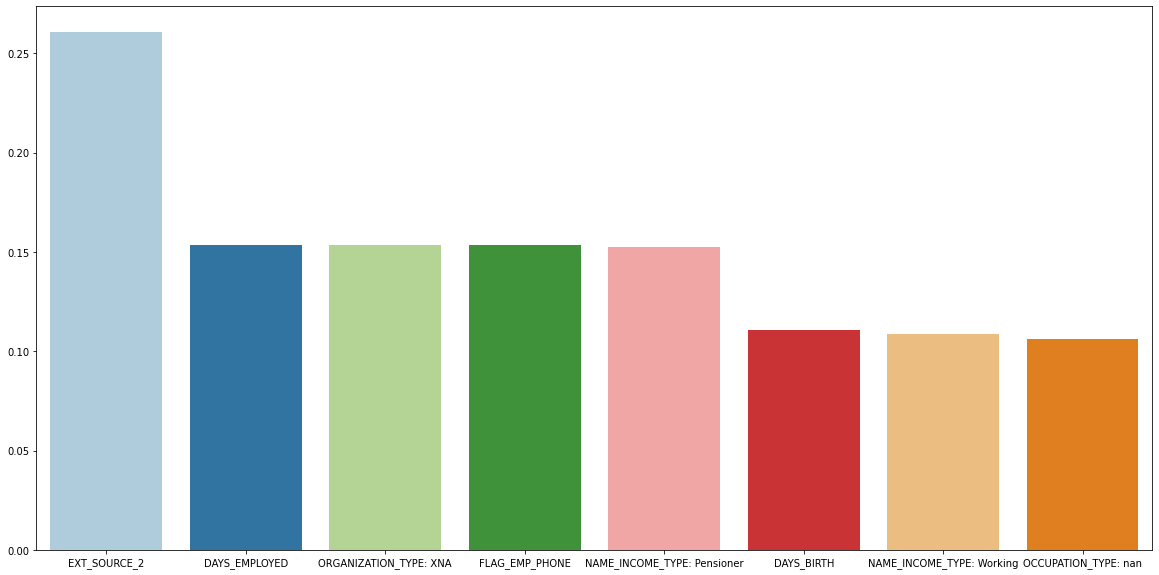

In [33]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = FN_cor.index[:8], y = FN_cor.values[:8])

#### False Positive

In [34]:
FP_cor = test_X.corr()["FP"][:-4].abs()
FP_cor = FP_cor.sort_values(ascending = False)[:10]

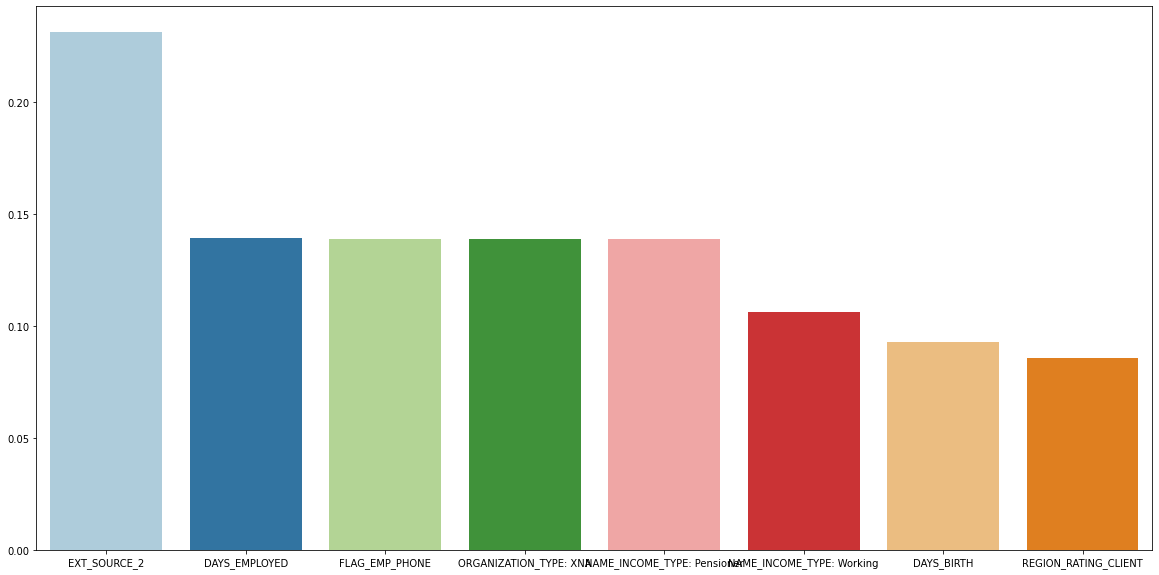

In [35]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = FP_cor.index[:8], y = FP_cor.values[:8])

#### Accuracy